# Run this once in google colab

In [1]:
!git clone -b implementing-vars https://github.com/DrYogurt/Aero-Design-Team-Gamma.git
!pip install poetry==1.4.2

Cloning into 'Aero-Design-Team-Gamma'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 259 (delta 3), reused 1 (delta 1), pack-reused 254 (from 1)
Receiving objects: 100% (259/259), 41.47 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Updating files: 100% (36/36), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of poetry-plugin-export to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of virtualenv to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of virtualenv to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the depend

In [1]:
%cd Aero-Design-Team-Gamma
!poetry config virtualenvs.in-project true
!poetry install --no-ansi

/content/Aero-Design-Team-Gamma
Creating virtualenv aerospace-design-team-gamma in /content/Aero-Design-Team-Gamma/.venv
Installing dependencies from lock file
The lock file might not be compatible with the current version of Poetry.
Upgrade Poetry to ensure the lock file is read properly or, alternatively, regenerate the lock file with the `poetry lock` command.

Package operations: 134 installs, 1 update, 0 removals

  • Installing attrs (25.1.0)
  • Installing rpds-py (0.22.3)
  • Installing typing-extensions (4.12.2)
  • Installing referencing (0.36.2)
  • Installing six (1.17.0)
  • Installing jsonschema-specifications (2024.10.1)
  • Installing platformdirs (4.3.6)
  • Installing traitlets (5.14.3)
  • Installing python-dateutil (2.9.0.post0)
  • Installing types-python-dateutil (2.9.0.20241206)
  • Installing arrow (1.3.0)
  • Installing fastjsonschema (2.21.1)
  • Installing jsonschema (4.23.0)
  • Installing jupyter-core (5.7.2)
  • Installing pycparser (2.22)
  • Installing p

In [2]:
VENV_PATH = "/content/Aero-Design-Team-Gamma/.venv/lib/python3.11/site-packages"
import os, sys
LOCAL_VENV_PATH = '/content/venv' # local notebook
os.symlink(VENV_PATH, LOCAL_VENV_PATH) # connect to directory in drive
sys.path.insert(0, LOCAL_VENV_PATH)

# Code Begins Here

In [1]:
from scripts.aircraft_drawing_new import AircraftPlotter
import pprint
import matplotlib.pyplot as plt

Begin by defining how many floors you want then the galley sizing (galleys get summed up to a total length, the floors are irrelevant), then define the engine locations for each side. Don't know what it'll look like? no worries! when you run this block of code it will generate a three view for you to look at!

seats per row: 50
Total Cargo Volume: 43076 ft^3


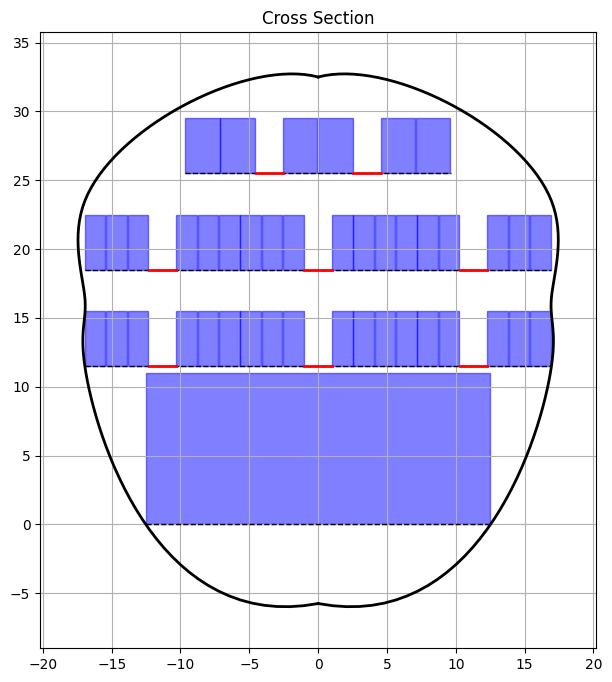

/home/dryogurt/Documents/Habitats/Aero-Design-Team-Gamma/scripts/aircraft_drawing_new.py:533: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


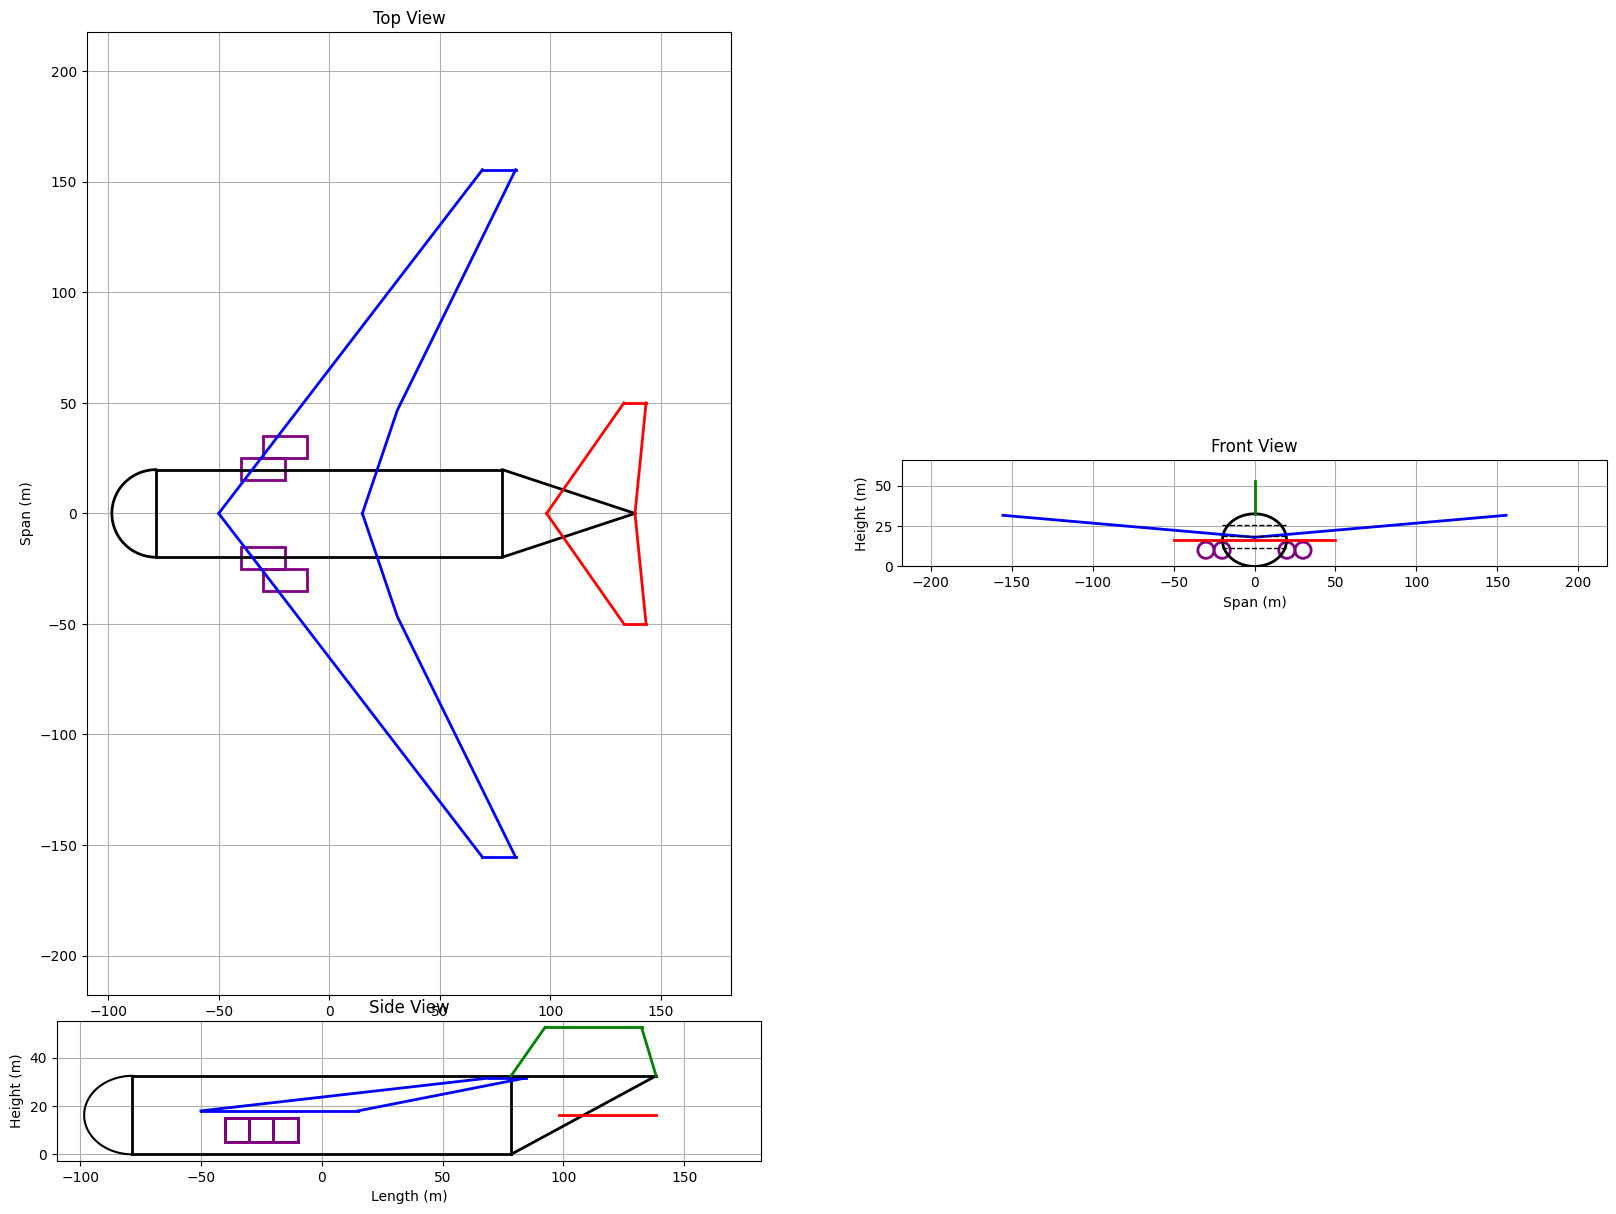

{'cockpit': {'length': 20},
 'fuselage': {'floor_heights': [11.5, 7, 7, 7],
              'height': 32.5,
              'length': 156.64000000000001,
              'num_floors': 4,
              'width': 39.6},
 'fuselage_length': 156.64000000000001,
 'fuselage_width': 39.6,
 'galleys': [{'floor': 1, 'length': 20, 'number': 2},
             {'floor': 2, 'length': 20, 'number': 2}],
 'htail': {'chord_data': [(0, 40), (100, 10)],
           'configuration': 'low',
           'span': 100,
           'sweep': 0.6108652381980153},
 'required_rows': 24,
 'seating': {'configs': [{'aisle_width': 0.5,
                          'cargo': True,
                          'ceiling_height': 11.5,
                          'headroom_height': 0,
                          'seat_depth': 2,
                          'seat_distribution': [1],
                          'seat_height': 11,
                          'seat_width': 25},
                         {'aisle_width': 2,
                          'ceili

In [2]:
# Add seating configuration
seat_configs = [
    {
        'seat_width': 25,
        'seat_depth': 2,    
        'seat_height': 11,
        'headroom_height':0,
        'ceiling_height':11.5,
        'aisle_width': 0.5,
        'seat_distribution':[1],
        'cargo':True
    },
    {
        'seat_width': 1.5,
        'seat_depth': 2.6,
        'seat_height': 4,
        'headroom_height':1,
        'ceiling_height':7,
        'aisle_width': 2,
        'seat_distribution':[3,6,6,3]
    },
    {
        'seat_width': 1.5,
        'seat_depth': 2.6,
        'seat_height': 4,
        'headroom_height':1,
        'ceiling_height':7,
        'aisle_width': 2,
        'seat_distribution':[3,6,6,3]
    },
    {
        'seat_width': 2.5,
        'seat_depth': 2.6,
        'seat_height': 4,
        'headroom_height':1,
        'ceiling_height':7,
        'aisle_width': 2,
        'seat_distribution':[2,2,2]
    },

]
galleys = [
    {'length': 20, 'number':2, 'floor': 1},
    {'length': 20, 'number':2, 'floor': 2}
]

engines = [
{
    'radius': 5,
    'length': 20,
    'positions': [
        (-30, 30, 10),  # (x, y, height) from centerline
        (-40, 20, 10)
    ]
}
]



plotter = AircraftPlotter(
    total_passengers=1200,
    seat_configs=seat_configs,
    galleys=galleys,
    wingspan=311, #f
    sweep=37.5, #deg
    wing_chord_data=[(0, 65), (30, 45), (100, 15)],
    wing_thickness=0.12, dihedral=5,
    v_span=20, 
    v_sweep=35,
    v_chord_data=[(0, 60), (100, 40)],
    h_span=100,
    h_sweep=35,
    h_chord_data=[(0, 40), (100, 10)],
    tail_configuration='low',
    wing_center_x=-50,  # Move wing forward
    wing_center_y=18,   # Adjust wing height
    cockpit_length=20,
    cargo_per_passenger=10, #set this lower if you don't care about usable cargo volume
    engines=engines
)
fig, ax = plotter.plot_cross_section()
plt.show()
fig = plotter.plot_three_view()
plt.show()
pprint.pprint(plotter.to_dict())

once you like your design, you can save all the images to the assets folder

In [ ]:
# Generate plots
fig, ax = plotter.plot_top_view()
plt.savefig('assets/aircraft_top_view.png', dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plotter.plot_side_view()
plt.savefig('assets/aircraft_side_view.png', dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plotter.plot_front_view()
plt.savefig('assets/aircraft_front_view.png', dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plotter.plot_cross_section()
plt.savefig('assets/aircraft_cross_section.png', dpi=300, bbox_inches='tight')
plt.close()

fig = plotter.plot_three_view()
plt.savefig('assets/aircraft_three_view.png', dpi=300, bbox_inches='tight')
plt.close()